# Training a convnet from scratch on a small dataset

Training an image-classification model using __very little data__ is a common situation in practice.<br>
A __“few”__ samples can mean anywhere from a __few hundred__ to a __few tens of thousands__ of images

### Dataset
As a practical example, we’ll focus on classifying images as dogs or cats, in a dataset containing __4,000__ pictures of cats and dogs (2,000 cats, 2,000 dogs). We’ll use 2,000 pictures for training—1,000 for validation, and
1,000 for testing.

In [1]:
import os, shutil

In [2]:
def create_dir(fdir):
    if os.path.exists(fdir):
        return fdir
    else :
        os.makedirs(fdir)
        return fdir

In [3]:
def copy_files(fnames, src_dir, dst_dir):
    for fname in fnames:
        src = os.path.join(src_dir, fname)
        dst = os.path.join(dst_dir, fname)
        shutil.copyfile(src, dst)

In [4]:
def count_files(fdir):
    return len(os.listdir(fdir))

In [5]:
original_dataset_dir = "/Users/emmanuel.doro/Phaser/PhaserData/KaggleData/cat_and_dogs/train"
base_dir = "/Users/emmanuel.doro/Phaser/PhaserDev/phaser-analytics-dl/chollet-dl-book/chp5/data/cats_and_dogs_small"

### Create respective directories

In [105]:
train_dir = create_dir(os.path.join(base_dir, 'train'))
validation_dir = create_dir(os.path.join(base_dir, 'validation'))
test_dir = create_dir(os.path.join(base_dir, 'test'))

In [18]:
train_cats_dir = create_dir(os.path.join(train_dir, 'cats'))
validation_cats_dir = create_dir(os.path.join(validation_dir, 'cats'))
test_cats_dir = create_dir(os.path.join(test_dir, 'cats'))

In [8]:
train_dogs_dir = create_dir(os.path.join(train_dir, 'dogs'))
validation_dogs_dir = create_dir(os.path.join(validation_dir, 'dogs'))
test_dogs_dir = create_dir(os.path.join(test_dir, 'dogs'))

#### copy the first 1,000 cat images to train_cats_dir

In [19]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
copy_files(fnames, original_dataset_dir, train_cats_dir)

#### copy the next 500 cat images to validation_cats_dir

In [10]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
copy_files(fnames, original_dataset_dir, validation_cats_dir)

#### copy the next 500 cat images to test_cats_dir

In [11]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
copy_files(fnames, original_dataset_dir, test_cats_dir)

#### copy the first 1,000 dog images to train_dogs_dir

In [12]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
copy_files(fnames, original_dataset_dir, train_dogs_dir)

#### copy the next 500 dog images to validation_dogs_dir

In [13]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
copy_files(fnames, original_dataset_dir, validation_dogs_dir)

#### copy the next 500 dog images to test_dogs_dir

In [14]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
copy_files(fnames, original_dataset_dir, test_dogs_dir)

In [15]:
print('total training cat images:', count_files(train_cats_dir))
print('total validation cat images:', count_files(validation_cats_dir))
print('total test cat images:', count_files(test_cats_dir))

total training cat images: 1000
total validation cat images: 500
total test cat images: 500


In [16]:
print('total training dog images:', count_files(train_dogs_dir))
print('total validation dog images:', count_files(validation_dogs_dir))
print('total test dog images:', count_files(test_dogs_dir))

total training dog images: 1000
total validation dog images: 500
total test dog images: 500


### Naive Model
With little data and no regularization, we train model to define __baseline performance__.

In [20]:
from keras import layers
from keras import models

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Define Network

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), 
                        activation='relu', 
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

#### Compile Network

In [23]:
from keras import optimizers

In [24]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


### Data preprocessing
Data should be formatted into appropriately preprocessed floating point tensors before being fed into the network.<br>
Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows

-  Read the picture files.
-  Decode the JPEG content to RGB grids of pixels.
-  Convert these into floating-point tensors.
-  Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

Keras has a module with image-processing helper tools, located at __keras.preprocessing.image__ for automatically preprocessing images.

#### Using ImageDataGenerator to read images from directories

In [25]:
from keras.preprocessing.image import ImageDataGenerator

#### Define generators with rescaling parameters

In [26]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

#### Define generators to read from directories

In [27]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=20, 
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [28]:
validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                              target_size=(150, 150), 
                                                              batch_size=20, 
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


### Fitting the model using a batch generator

In [41]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 125s - loss: 0.3924 - acc: 0.8245 - val_loss: 0.5416 - val_acc: 0.7250
Epoch 2/30
100/100 [==============================] - 118s - loss: 0.3672 - acc: 0.8380 - val_loss: 0.5516 - val_acc: 0.7210
Epoch 3/30
100/100 [==============================] - 122s - loss: 0.3392 - acc: 0.8540 - val_loss: 0.5745 - val_acc: 0.7200
Epoch 4/30
100/100 [==============================] - 139s - loss: 0.3241 - acc: 0.8675 - val_loss: 0.5724 - val_acc: 0.7220
Epoch 5/30
100/100 [==============================] - 127s - loss: 0.3058 - acc: 0.8665 - val_loss: 0.6634 - val_acc: 0.6940
Epoch 6/30
100/100 [==============================] - 134s - loss: 0.2647 - acc: 0.8955 - val_loss: 0.5470 - val_acc: 0.7560
Epoch 7/30
100/100 [==============================] - 128s - loss: 0.2697 - acc: 0.8920 - val_loss: 0.5853 - val_acc: 0.7380
Epoch 8/30
100/100 [==============================] - 135s - loss: 0.2371 - acc: 0.9095 - val_loss: 0.5671 - val_acc: 0.7520


#### Save Model

In [46]:
model.save('catsAndDogs_small_1.h5')

### Displaying curves of loss and accuracy during training

One of the default callbacks that is registered when training all deep learning models is the __History callback__. It __records training metrics__ for each epoch. This includes the loss and the accuracy (for classification problems) as well as the loss and accuracy for the validation dataset

In [47]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [50]:
epochs = range(1, len(acc)+1)

#### Accuracy

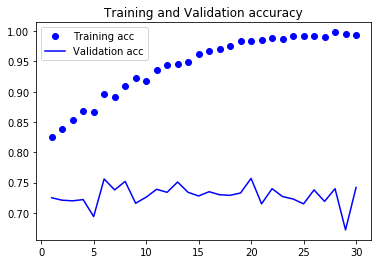

In [51]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

#### Loss

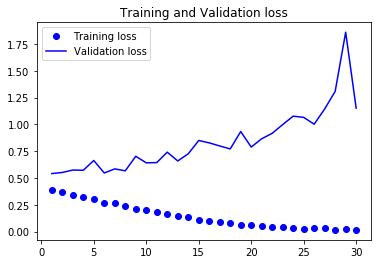

In [52]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

### What do you see from the plots?
These plots are characteristic of __overfitting__. 

-  The training accuracy increases linearly over time, until it reaches nearly __100%__, whereas the validation accuracy stalls at __70–72%__.

-  The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0.

__Because you have relatively few training samples (2,000), overfitting will be your
number-one concern.__

You already know about a number of techniques that can help
mitigate overfitting, such as __dropout and weight decay__ (L2 regularization). 

We’re now going to work with a new one, __specific to computer vision__ and used almost universally
when processing images with deep-learning models: __data augmentation__.

## Using data augmentation

Overfitting is caused by having __too few samples__ to learn from, rendering you unable to train a model that can generalize to new data.

Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of __random transformations__ that yield believable-looking images.

The goal is that at training time, your model will never see the exact same picture twice. This helps expose the model
to more aspects of the data and generalize better.

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the ImageDataGenerator instance.

### Setting up data augmentation configuration via ImageDataGenerator

In [53]:
datagen = ImageDataGenerator(rotation_range=40, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True, 
                             fill_mode='nearest')

-  __rotation_range__ is a value in degrees (0–180), a range within which to randomly rotate pictures.
-  __width_shift__ and __height_shift__ are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
-  __shear_range__ is for randomly applying shearing transformations.
-  __zoom_range__ is for randomly zooming inside pictures.
-  __horizontal_flip__ is for randomly flipping half the images horizontally
-  __fill_mode__ is the strategy used for filling in newly created pixels, which can
appear after a rotation or a width/height shift.

#### Get Keras image preprocessor 

In [54]:
from keras.preprocessing import image

#### Get file names

In [55]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

#### Transform and plot image

(150, 150, 3)
(1, 150, 150, 3)


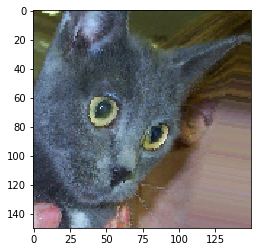

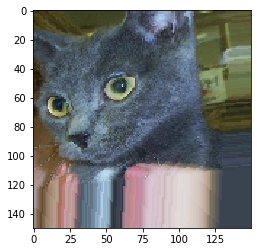

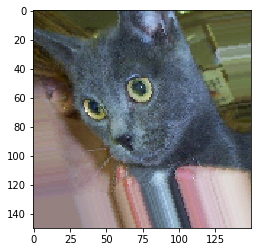

In [91]:
img_path = fnames[90]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
print(x.shape)
x = x.reshape((1,) + x.shape)
print(x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 3 == 0:
        break

### Why this might not be enough?
If you train a new network using this data-augmentation configuration, the network
will never see the same input twice. 

But the inputs it sees are still heavily __intercorrelated__, because they come from __a small number of original images__—you can’t produce new information, you can only remix existing information. 

As such, this may not be enough to completely get rid of overfitting. To further fight overfitting, you’ll also
add a __Dropout__ layer to your model, right before the densely connected classifier

## Training a Convnet with Dropout and Data Augmentation 

### Defining the Model with Dropout

In [92]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), 
                        activation='relu', 
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [93]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### Compile

In [94]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

### Training the convnet using data-augmentation generators

In [95]:
train_datagen = ImageDataGenerator(rescale=1.0/255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2,
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

In [96]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)

In [97]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=20, 
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [98]:
validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                              target_size=(150, 150), 
                                                              batch_size=20, 
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [99]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 128s - loss: 0.6943 - acc: 0.5170 - val_loss: 0.6860 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 121s - loss: 0.6890 - acc: 0.5470 - val_loss: 0.6714 - val_acc: 0.5330
Epoch 3/30
100/100 [==============================] - 130s - loss: 0.6774 - acc: 0.5710 - val_loss: 0.6812 - val_acc: 0.5450
Epoch 4/30
100/100 [==============================] - 126s - loss: 0.6692 - acc: 0.5880 - val_loss: 0.7119 - val_acc: 0.5160
Epoch 5/30
100/100 [==============================] - 123s - loss: 0.6655 - acc: 0.6005 - val_loss: 0.6498 - val_acc: 0.6220
Epoch 6/30
100/100 [==============================] - 127s - loss: 0.6532 - acc: 0.6145 - val_loss: 0.6290 - val_acc: 0.6420
Epoch 7/30
100/100 [==============================] - 136s - loss: 0.6405 - acc: 0.6330 - val_loss: 0.6096 - val_acc: 0.6600
Epoch 8/30
100/100 [==============================] - 126s - loss: 0.6369 - acc: 0.6345 - val_loss: 0.6132 - val_acc: 0.6410


In [100]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [101]:
epochs = range(1, len(acc)+1)

#### Accuracy

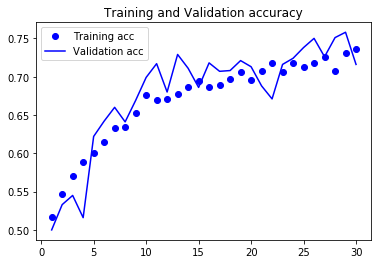

In [102]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

#### Loss

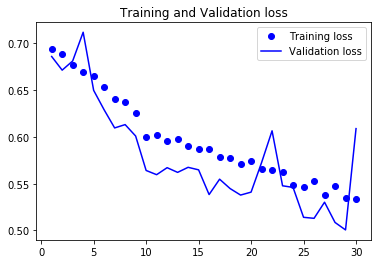

In [103]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

### Note:
Training and validation curves track more closely now. Which means model is not overfitting. But there is room for improvement. 

In [104]:
model.save('catsAndDogs_small_2.h5')